# ***DATENAGGREGATION***

## 1. Bibliotheken laden!

In [724]:
import pandas as pd
import plotly.express as px

## 2. Dateie einlesen

In [725]:
df = pd.read_csv('Netto.csv')
df.head() # Anzeige der ersten 5 Zeilen 

,Datum (MEZ),Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
0,NaN,Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW),Leistung (MW)
1,2024-01-01T00:00+01:00,2223.2,4180.6,3314,1566,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367,2.4,40592.6
2,2024-01-01T00:15+01:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844,5747.9,29028,2.4,40301.1
3,2024-01-01T00:30+01:00,2218.7,4185.5,3340.2,1567,397.8,2516.7,22.9,90,470.4,152.4,836,5618.1,29035.8,1.6,40171.7
4,2024-01-01T00:45+01:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512,29440.9,1.7,39615


# 3. Zweite Zeile Löschen

### Hier hat die Datei eine Zusatzzeile hat, die keine Daten enthält.
### Hier steht in Zeile 2 (also index 1):
### NaN	Leistung (MW)	Leistung (MW)	Leistung (MW)	Leistung (MW)
### Das ist kein echter Datensatz, sondern ein Kommentar!
### Wenn wir ihn nicht überspringen, meckert Python später rum („kann ich nicht in Zahlen umwandeln“).
### Hier sehen wir nun dass die 2 Zeile gelöscht wurde. Dies geht mit der Methode: skiprows=[1])

In [726]:
df = pd.read_csv("Netto.csv", skiprows=[1]) ## Überspringe die erste Zeile
df.head()


,Datum (MEZ),Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
0,2024-01-01T00:00+01:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6
1,2024-01-01T00:15+01:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1
2,2024-01-01T00:30+01:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7
3,2024-01-01T00:45+01:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0
4,2024-01-01T01:00+01:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8


# 4. Datum Zeile (Name umbennen)

### Warum geben wir der Spalte einen anderen Namen? → rename(...)
### Weil "Datum (MEZ)" ein komplizierter Name ist.
### Stell dir vor, du musst das 10 Mal tippen. Dann ist "Datum" einfacher als "Datum (MEZ)".
### Außerdem: Klammern und Leerzeichen führen bei späteren Analysen oft zu Fehlern.

In [727]:
df = df.rename(columns={"Datum (MEZ)": "Datum"}) ### df.rename Methode zum umbennen
df.head()

,Datum,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
0,2024-01-01T00:00+01:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6
1,2024-01-01T00:15+01:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1
2,2024-01-01T00:30+01:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7
3,2024-01-01T00:45+01:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0
4,2024-01-01T01:00+01:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8


In [728]:
print(df.dtypes)

Datum              object
Laufwasser        float64
Biomasse          float64
Braunkohle        float64
Steinkohle        float64
Öl                float64
Erdgas            float64
Geothermie        float64
Speicherwasser    float64
Pumpspeicher      float64
Andere            float64
Müll              float64
Wind Offshore     float64
Wind Onshore      float64
Solar             float64
Last              float64
dtype: object


# 5. Umwandeln der Zeit in ein Datumsformat – inklusive UTC-Zeitangabe mit der Methode: pd.to_datetime(..., utc=True): 

In [730]:
df['Datum'] = pd.to_datetime(df['Datum'], errors="coerce", utc=True)  ### coordinated universal time 
df.head() 

,Datum,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
0,2023-12-31 23:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6
1,2023-12-31 23:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1
2,2023-12-31 23:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7
3,2023-12-31 23:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0
4,2024-01-01 00:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8


### Warum benutzen wir pd.to_datetime(..., utc=True)?
###  Weil wir aus einem Text ein echtes Datum machen müssen.

### Python erkennt „01.01.2024 00:00“ erstmal nur als Text.
### Aber wir wollen damit rechnen – z. B. Mittelwerte pro Tag bilden oder „ab 18 Uhr ist Nacht“ sagen.

### pd.to_datetime(...) macht daraus eine echte Zeitinformation.
### utc=True heißt: Wir speichern es in der Weltzeit (UTC), damit wir später z. B. deutsche Zeit (MEZ) umrechnen können. Das hilft auch bei Zeitumstellung & Plotly-Grafiken.

### errors="coerce" – Das bedeutet: Wenn beim Umwandeln ein Fehler passiert (z. B. weil der Text kein echtes Datum ist), dann ersetze ihn durch NaT = Not a Time (also: fehlt).
### Ohne errors="coerce" würdest du eine Fehlermeldung bekommen und dein ganzes Programm bricht ab. 
### Mit errors="coerce" macht Python daraus einfach: NaT 


# 6. Überprüfung des Datentyps mit print(df.dtypes)

In [731]:
print(df.dtypes)

Datum             datetime64[ns, UTC]
Laufwasser                    float64
Biomasse                      float64
Braunkohle                    float64
Steinkohle                    float64
Öl                            float64
Erdgas                        float64
Geothermie                    float64
Speicherwasser                float64
Pumpspeicher                  float64
Andere                        float64
Müll                          float64
Wind Offshore                 float64
Wind Onshore                  float64
Solar                         float64
Last                          float64
dtype: object


# 7. Überprüfung auf fehlerhafte Einträge (NaN) mit .isna().sum (isna=is not available)

In [733]:
df

,Datum,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
0,2023-12-31 23:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6
1,2023-12-31 23:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1
2,2023-12-31 23:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7
3,2023-12-31 23:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0
4,2024-01-01 00:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30557,2024-11-14 06:15:00+00:00,1713.8,4033.5,12845.6,6641.4,320.6,12828.5,16.4,57.8,177.8,226.5,1122.7,6211.4,12961.5,36.2,64694.0
30558,2024-11-14 06:30:00+00:00,1727.2,4054.8,12849.0,6675.0,320.0,13042.0,16.6,64.1,369.7,226.0,1117.8,6594.6,12903.0,90.0,65861.0
30559,2024-11-14 06:45:00+00:00,1728.6,4055.8,12823.0,6736.0,321.0,13245.0,16.6,87.2,445.1,234.0,1119.3,6627.0,12789.0,234.0,66587.0
30560,2024-11-14 07:00:00+00:00,1721.9,4063.7,12753.0,6768.0,321.0,13358.0,16.6,64.8,863.9,247.0,1119.3,6521.0,12797.0,482.0,67881.0


In [732]:
df['Datum'].isna().sum() ### isna = is not a number , .sum(). Zählt, wie viele True-Werte es gibt


np.int64(0)

# 8. Datum zur Zeitachse – wichtig für Zeitreihenanalyse.

In [734]:
df = df.set_index('Datum')

In [735]:
print(df.index)


DatetimeIndex(['2023-12-31 23:00:00+00:00', '2023-12-31 23:15:00+00:00',
               '2023-12-31 23:30:00+00:00', '2023-12-31 23:45:00+00:00',
               '2024-01-01 00:00:00+00:00', '2024-01-01 00:15:00+00:00',
               '2024-01-01 00:30:00+00:00', '2024-01-01 00:45:00+00:00',
               '2024-01-01 01:00:00+00:00', '2024-01-01 01:15:00+00:00',
               ...
               '2024-11-14 05:00:00+00:00', '2024-11-14 05:15:00+00:00',
               '2024-11-14 05:30:00+00:00', '2024-11-14 05:45:00+00:00',
               '2024-11-14 06:00:00+00:00', '2024-11-14 06:15:00+00:00',
               '2024-11-14 06:30:00+00:00', '2024-11-14 06:45:00+00:00',
               '2024-11-14 07:00:00+00:00', '2024-11-14 07:15:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Datum', length=30562, freq=None)


In [ ]:
df

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
Datum,,,,,,,,,,,,,,,
2023-12-31 23:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6
2023-12-31 23:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1
2023-12-31 23:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7
2023-12-31 23:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0
2024-01-01 00:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-14 06:15:00+00:00,1713.8,4033.5,12845.6,6641.4,320.6,12828.5,16.4,57.8,177.8,226.5,1122.7,6211.4,12961.5,36.2,64694.0
2024-11-14 06:30:00+00:00,1727.2,4054.8,12849.0,6675.0,320.0,13042.0,16.6,64.1,369.7,226.0,1117.8,6594.6,12903.0,90.0,65861.0
2024-11-14 06:45:00+00:00,1728.6,4055.8,12823.0,6736.0,321.0,13245.0,16.6,87.2,445.1,234.0,1119.3,6627.0,12789.0,234.0,66587.0


### Warum brauchen wir set_index("Datum")? Damit das Datum zur Zeitachse wird.
### Das brauchen wir für: Zeitreihen-Diagramme (X-Achse = Zeit) Aggregationen wie .resample("D") (= pro Tag zusammenfassen). Ohne set_index(...) denkt Pandas: „Datum ist einfach nur eine normale Spalte“. Mit,  set_index(...) wird’s zur Hauptachse, auf die sich alles bezieht.

# 9. Zusammengefasster eingelesener, veränderter Code:

                                                                    ## df = pd.read_csv("Netto.csv", skiprows=[1])
                                                                    ## df = df.rename(columns={"Datum (MEZ)": "Datum"})
                                                                    ## df['Datum'] = pd.to_datetime(df['Datum'], errors="coerce", utc=True)
                                                                    ## df = df.set_index('Datum')

# 10. Daten pro Tag, Woche und Monat aggregieren


In [737]:
df_tag = df.resample("D").mean(numeric_only=True)     # täglich   ### .resample() Gruppiert die Daten neu – hier nach Tagen („D“ = Day). Voraussetzung: Der Index muss ein DatetimeIndex sein!
df_woche = df.resample("W").mean(numeric_only=True)   # wöchentlich ## mean(numeric_only=True) . Berechnet den Tagesdurchschnitt aller numerischen Spalten (z. B. Solar, Wind, Last).
df_monat = df.resample("M").mean(numeric_only=True)   # monatlich

/var/folders/l8/cgzy5d692sd7d5_rw1hslkmw0000gn/T/ipykernel_47177/987235692.py:3: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



### resample() ist eine Methode in Pandas, mit der man Zeitreihen-Daten in andere Zeiträume umrechnen kann– z. B. von 15 Minuten auf Tage, Wochen oder Monate.
### Ich habe hier Werte von alle 15 min. Wenn ich aber von einem ganzen Tag die Werte haben möchte kann ich die das mit der Methode resample('D') machen.
### df.resample("D").mean() -- → Rechnet den Tagesdurchschnitt (alle 15-Minuten-Werte eines Tages werden gemittelt).
### df.resample("W").sum() --- → Fasst alle Werte pro Woche zusammen (z. B. Energieerzeugung gesamt pro Woche).
### df.resample("M").mean() -- → "M" steht für "Month-End". Du bekommst für jeden Monat einen Wert (z. B. Durchschnitt pro Monat).


# Visualisierung

In [791]:
import pandas as pd
import plotly.express as px

# ➤ Beispielgruppen definieren
konventionell = ['Braunkohle', 'Steinkohle', 'Erdgas', 'Öl', 'Müll', 'Andere']
erneuerbar = ['Solar', 'Wind Onshore', 'Wind Offshore', 'Laufwasser', 'Biomasse', 'Geothermie']

# ➤ Neue Spalten berechnen
df['Konventionell'] = df[konventionell].sum(axis=1)
df['Erneuerbar'] = df[erneuerbar].sum(axis=1)

# ➤ Optional: nach Tag aggregieren (wenn Daten stündlich sind)
df_tag = df.resample("D").mean(numeric_only=True).copy()

# ➤ DataFrame in langes Format bringen
df_melted = df_tag[['Konventionell', 'Erneuerbar']].reset_index().melt(
    id_vars='Datum', var_name='Stromart', value_name='Leistung in MW'
)

# ➤ Diagramm erstellen
fig = px.area(
    df_melted,
    x='Datum',
    y='Leistung in MW',
    color='Stromart',
    title='Vergleich Konventionelle vs. Erneuerbare Stromerzeugung',
    color_discrete_map={
        'Konventionell': 'firebrick',
        'Erneuerbar': 'seagreen'
    }
)

fig.update_layout(template='simple_white')
fig.show()


In [739]:
fig = px.line(
    df_tag,
    title="Tägliche durchschnittliche Stromerzeugung 2024 Liniendiagram px.line"
)
fig.show()

### Jede Linie steht für eine Energiequelle: Solar, Wind Onshore, Braunkohle usw. Du erkennst Verläufe über das Jahr, z. B. Solar steigt im Frühling/Sommer, Kohle springt an, wenn Wind fehlt“ 

# 11. Umbennung der y-Achse + Anzeige der Grafik  mit Plotly

In [738]:
fig = px.line(
    df_tag,
    title="Tägliche durchschnittliche Stromerzeugung 2024, x und y Achse umbennant ('Value)",
    labels={"value": "Leistung in Megawatt", "variable": "Energiequelle", "Datum": "Datum"} 
)
fig.show()

### Was macht labels={...} in Plotly? labels dient dazu, die Anzeige-Namen in deiner Grafik zu ändern – also z. B.:
### Bereich	Ohne labels	Mit labels={"value": "Leistung (MW)"}
### Y-Achse	value	Leistung (MW)
### X-Achse	Datum	Datum
### Legende	variable	Energiequelle
### Tooltip	value, variable	Leistung (MW), Energiequell
#### labels ist wie ein Wörterbuch, das sagt: "Zeige dem Menschen dieses Wort anstelle von diesem internen Namen."

# 12. Methode melt() - Umwandlung der Zellen in Long Format für Farbformatierung

### Für Zeitreihen-Rechnungen wie .resample() brauchst du den Datum-Index 
### Für Visualisierungen brauchst du "Datum" als Spalte 
### melt(..., ignore_index=False)	Nutzt den Index (also Datum) als Zeileninfo
### .reset_index()	Wandelt den Index nachträglich in eine Spalte um

In [654]:
strom_lang = df_tag.melt(
    ignore_index=False,
    var_name="Energiequelle",
    value_name="Leistung in MW"
).reset_index()


In [740]:
print(strom_lang.columns)      # Jetzt: 'Datum', 'Energiequelle', 'Leistung in MW'
print(strom_lang.head())

Index(['Datum', 'Energiequelle', 'Leistung in MW'], dtype='object')
                      Datum Energiequelle  Leistung in MW
0 2023-12-31 00:00:00+00:00    Laufwasser     2220.225000
1 2024-01-01 00:00:00+00:00    Laufwasser     2183.601042
2 2024-01-02 00:00:00+00:00    Laufwasser     2123.932292
3 2024-01-03 00:00:00+00:00    Laufwasser     2076.581250
4 2024-01-04 00:00:00+00:00    Laufwasser     2091.518750


### Die Methode .melt() erstellt eine neue Version – im Long Format – und speichert sie in einer neuen Variable namens df_melted.
### df_tag bleibt wie er ist (Wide Format)
### df_melted ist die umgewandelte Version (Long Format)
### Damit Plotly oder andere Visualisierungs-Tools wissen, welche Spalte zu welcher Energiequelle gehört – und wir so Farben, Legenden & Filter korrekt steuern können brauchen wir diese Methode, im oberen Beispiel hat z.b. wind und kohle fast die gleiche Farbe. Ohne diese Methode übergibt plotly zufälig Farben, was zu Verwirrung führt.
### melt() = Voraussetzung für saubere, steuerbare Grafiken,
### besonders wenn du viele Kategorien hast. 



# 13. Eigene Farben festlegen mit einer Variable

In [741]:
farben = {
    "Laufwasser": "#1f77b4",
    "Biomasse": "#ff7f0e",
    "Braunkohle": "#2ca02c",
    "Steinkohle": "#d62728",
    "Öl": "#9467bd",
    "Erdgas": "#8c564b",
    "Geothermie": "#e377c2",
    "Speicherwasser": "#7f7f7f",
    "Pumpspeicher": "#bcbd22",
    "Andere": "#17becf",
    "Müll": "#ff1493",
    "Wind Offshore": "#4682b4",
    "Wind Onshore": "#006400",
    "Solar": "#ffd700",
    "Last": "#000000"
}

# 14. Visualisierung Liniengrafik mit Farben und Methode melt()

In [742]:
fig = px.line(
    strom_lang, ## neue variable nach melting
    x="Datum",
    y="Leistung in MW",
    color="Energiequelle",
    color_discrete_map=farben,
    title="Tägliche durchschnittliche Stromerzeugung 2024",
    labels={
        "Datum": "Datum",
        "Energiequelle": "Energiequelle",
        "Leistung in MW": "Leistung in Megawatt"
    }
)


In [743]:
fig.show()

## Man sieht hier sobald Wind Offshore herunterggangen ist, hat sich Braunkohle erhöht

# 15. Hintergrundfarbe ändern

In [744]:
fig.update_layout(
    plot_bgcolor="#3aaeae",   # heller Bereich hinter den Linien
    paper_bgcolor="#f2f080",  # gesamter Hintergrund
)


# 16. Gesamter Code im Überblick 

                                                                import pandas as pd
                                                                import plotly.express as px

###                                                                 Datei vorbereiten (nur falls noch nicht gemacht)
                                                                df = pd.read_csv("Netto.csv", skiprows=[1])
                                                                df = df.rename(columns={"Datum (MEZ)": "Datum"})
                                                                df["Datum"] = pd.to_datetime(df["Datum"], errors="coerce", utc=True)
                                                                df = df.set_index("Datum")

###                                                                 # Tägliche Mittelwerte berechnen
                                                                df_tag = df.resample("D").mean(numeric_only=True)

###                                                                # In Long-Format umwandeln für Farben etc.
                                                                strom_lang = df_tag.melt(
                                                                    ignore_index=False,
                                                                    var_name="Energiequelle",
                                                                    value_name="Leistung in MW"
                                                                ).reset_index()

###                                                                # Eigene Farben festlegen
                                                                farben = {
                                                                    "Laufwasser": "#1f77b4",
                                                                    "Biomasse": "#ff7f0e",
                                                                    "Braunkohle": "#2ca02c",
                                                                    "Steinkohle": "#d62728",
                                                                    "Öl": "#9467bd",
                                                                    "Erdgas": "#8c564b",
                                                                    "Geothermie": "#e377c2",
                                                                    "Speicherwasser": "#7f7f7f",
                                                                    "Pumpspeicher": "#bcbd22",
                                                                    "Andere": "#17becf",
                                                                    "Müll": "#ff1493",
                                                                    "Wind Offshore": "#4682b4",
                                                                    "Wind Onshore": "#006400",
                                                                    "Solar": "#ffd700",
                                                                    "Last": "#000000"
                                                                }

###                                                                # Grafik erstellen
                                                                fig = px.line(
                                                                    strom_lang,
                                                                    x="Datum",
                                                                    y="Leistung in MW",
                                                                    color="Energiequelle",
                                                                    color_discrete_map=farben,
                                                                    title="Tägliche durchschnittliche Stromerzeugung 2024",
                                                                    labels={
                                                                        "Datum": "Datum",
                                                                        "Energiequelle": "Energiequelle",
                                                                        "Leistung in MW": "Leistung in Megawatt"
                                                                    }
                                                                )

###                                                                # Hintergrund anpassen
                                                                fig.update_layout(
                                                                    plot_bgcolor="#f9f9f9",   # heller Bereich hinter den Linien
                                                                    paper_bgcolor="#ffffff",  # gesamter Hintergrund
                                                                )

                                                                fig.show()

# 17. Tägliche Durchschnittswerte

In [745]:
df_tag = df.resample("D").mean(numeric_only=True).reset_index()
strom_tag = df_tag.melt(id_vars="Datum", var_name="Energiequelle", value_name="Leistung in MW")

fig = px.line(
    strom_tag,
    x="Datum",
    y="Leistung in MW",
    color="Energiequelle",
    title="Durchschnittliche Tägliche Stromerzeugung 2024",
    color_discrete_map=farben
)
fig.show()

In [747]:
df_tag

,Datum,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
0,2023-12-31 00:00:00+00:00,2220.225000,4184.150000,3352.500000,1570.725000,398.050000,2552.525000,22.850000,89.675000,512.600000,152.400000,832.700000,5679.225000,29217.925000,2.025000,40170.100000
1,2024-01-01 00:00:00+00:00,2183.601042,4315.327083,3464.797917,1636.243750,397.882292,2693.170833,21.393750,74.663542,836.538542,155.507292,808.739583,4134.302083,27484.520833,1551.834375,42470.787500
2,2024-01-02 00:00:00+00:00,2123.932292,4386.531250,3889.845833,1811.668750,394.946875,4405.025000,20.691667,76.555208,1624.777083,224.578125,828.984375,4794.009375,29018.712500,431.472917,53286.461458
3,2024-01-03 00:00:00+00:00,2076.581250,4345.962500,3737.367708,1929.778125,396.966667,4250.090625,19.031250,60.414583,1077.781250,215.737500,1089.555208,4017.073958,36942.517708,1290.008333,56428.302083
4,2024-01-04 00:00:00+00:00,2091.518750,4371.777083,8312.182292,2741.100000,341.745833,6341.957292,20.089583,141.063542,1387.909375,224.061458,1107.726042,2709.245833,20659.736458,1059.700000,57600.807292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,2024-11-10 00:00:00+00:00,1718.491667,4119.086458,11782.811458,4948.091667,308.962500,8697.560417,16.400000,73.870833,749.669792,192.851042,910.629167,1430.235417,1243.482292,1408.993750,47409.447917
316,2024-11-11 00:00:00+00:00,1746.093750,4125.676042,11789.994792,6485.414583,401.995833,11468.533333,16.400000,105.202083,1053.850000,233.119792,744.867708,4866.815625,6202.006250,1198.031250,59797.970833
317,2024-11-12 00:00:00+00:00,1846.559375,4137.638542,12350.281250,6918.984375,538.919792,13131.926042,16.400000,218.880208,1558.867708,261.618750,934.203125,1011.997917,4599.200000,1305.236458,60027.523958
318,2024-11-13 00:00:00+00:00,1830.396875,4116.242708,13131.904167,7022.367708,454.805208,13299.056250,16.400000,173.602083,1720.117708,253.256250,1114.120833,3379.915625,4215.134375,907.685417,61326.868750


# 18. Wöchentliche Durchschnittswerte

In [746]:
df_woche = df.resample("W").mean(numeric_only=True).reset_index()
strom_woche = df_woche.melt(id_vars="Datum", var_name="Energiequelle", value_name="Leistung in MW")

fig = px.line(
    strom_woche,
    x="Datum",
    y="Leistung in MW",
    color="Energiequelle",
    title="Durchschnittliche Wöchentliche Stromerzeugung 2024",
    color_discrete_map=farben
)
fig.show()

# 19. Monatliche Durchschnittswerte

In [666]:
df_monat = df.resample("M").mean(numeric_only=True).reset_index()
strom_monat = df_monat.melt(id_vars="Datum", var_name="Energiequelle", value_name="Leistung in MW")

fig = px.line(
    strom_monat,
    x="Datum",
    y="Leistung in MW",
    color="Energiequelle",
    title="Durchschnittliche Monatliche Stromerzeugung 2024 (Last=Gesamte Stromnachfrage)",
    color_discrete_map=farben
)
fig.show()

/var/folders/l8/cgzy5d692sd7d5_rw1hslkmw0000gn/T/ipykernel_47177/1431305847.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



# 20. 2. Hypothese: Solar vs. Wind Offshore: „Wenn Solarstrom hoch ist, ist Wind Offshore eher niedrig – und umgekehrt.“??? WENN MEHR SONNE, WENIGER WIND?

### - Solar hat klare Tages- und Jahresverläufe (im Winter wenig, im Sommer viel)
### - Wind Offshore ist weniger saisonabhängig, aber wetterabhängig.
### Erwartung:
### Ein abwechselndes Muster im Jahresverlauf (Sommer: Solar ↑, Wind ↓).
### Gute Ergänzung für ein stabiles Stromsystem

In [ ]:
df_solar_wind = df[["Solar", "Wind Offshore"]].resample("W").mean(numeric_only=True).reset_index()

fig = px.line(
    df_solar_wind,
    x="Datum",
    y=["Solar", "Wind Offshore"],
    title="Solar vs. Wind Offshore – Saisonaler Vergleich",
    labels={"value": "Leistung in MW", "variable": "Energiequelle"}
)
fig.show()

In [749]:
df_solar_wind = df[["Solar", "Wind Offshore"]].resample("W").mean(numeric_only=True).reset_index()

fig = px.line(
    df_solar_wind,
    x="Datum",
    y=["Solar", "Wind Offshore"],
    title="Solar vs. Wind Offshore – Saisonaler Vergleich",
    labels={"value": "Leistung in MW", "variable": "Energiequelle"}
)
fig.show()


### In diesem Vergleich habe ich die tägliche Stromerzeugung von Solar und Wind Offshore im Jahr 2024 analysiert.
### Solar zeigt einen klaren saisonalen Verlauf: hohe Werte im Sommer, sehr geringe im Winter.
### Wind Offshore hingegen liefert ganzjährig relativ stabile Leistung mit nur leichten Schwankungen.
### Schlussfolgerung:
### Solar ist tageslicht- und wetterabhängig, stark im Sommer.
### Wind Offshore ist wetterunabhängiger und konstanter – eine ideale Ergänzung im Energiemix.
### Dadurch lässt sich Versorgungssicherheit erhöhen, wenn beide kombiniert werden.

# 21. 6. Hypothese: Last vs. Erdgas – Zusammenhang bei hoher Last STREUDIAGRAM


### Hypothese: „Wenn die Netzlast steigt, wird verstärkt Erdgas eingesetzt.“
### Warum das spannend ist: Erdgas-Kraftwerke sind flexibel steuerbar (schneller hoch- & runterfahrbar). Sie werden oft eingesetzt, wenn plötzlich mehr Strom gebraucht wird.
### Erwartung: Positive Korrelation: Hohe Last → mehr Erdgas-Leistung. Scatterplot würde eine steigende Linie zeigen.



In [671]:
!pip3 install statsmodels 

#Fehlermeldung: ModuleNotFoundError: Das bedeutet: Die Funktion trendline="ols" (für Regressionslinie) braucht ein Zusatzmodul namens statsmodels, das nicht installiert ist.


In [752]:
df_last_gas = df[["Solar", "Wind Onshore"]].resample("D").mean(numeric_only=True).reset_index()

fig = px.scatter(
    df_last_gas,
    x="Solar",
    y="Wind Onshore",
    trendline="ols",  # fügt Regressionslinie hinzu
    title="Zusammenhang: Netzlast vs. Erdgasleistung Streudiagramm",
    labels={"Last": "Netzlast in MW", "Erdgas": "Erdgas-Leistung in MW"}
)
fig.show()

In [751]:
df

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
Datum,,,,,,,,,,,,,,,
2023-12-31 23:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6
2023-12-31 23:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1
2023-12-31 23:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7
2023-12-31 23:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0
2024-01-01 00:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-14 06:15:00+00:00,1713.8,4033.5,12845.6,6641.4,320.6,12828.5,16.4,57.8,177.8,226.5,1122.7,6211.4,12961.5,36.2,64694.0
2024-11-14 06:30:00+00:00,1727.2,4054.8,12849.0,6675.0,320.0,13042.0,16.6,64.1,369.7,226.0,1117.8,6594.6,12903.0,90.0,65861.0
2024-11-14 06:45:00+00:00,1728.6,4055.8,12823.0,6736.0,321.0,13245.0,16.6,87.2,445.1,234.0,1119.3,6627.0,12789.0,234.0,66587.0


In [750]:
df_last_gas = df[["Last", "Erdgas"]].resample("D").mean(numeric_only=True).reset_index()

fig = px.scatter(
    df_last_gas,
    x="Last",
    y="Erdgas",
    trendline="ols",  # fügt Regressionslinie hinzu
    title="Zusammenhang: Netzlast vs. Erdgasleistung Streudiagramm",
    labels={"Last": "Netzlast in MW", "Erdgas": "Erdgas-Leistung in MW"}
)
fig.show()


### Der Scatterplot zeigt: Je höher die Netzlast, desto mehr Erdgas wird im Durchschnitt eingesetzt. Die Regressionslinie bestätigt diesen Zusammenhang – allerdings ist er nicht perfekt, weil andere Faktoren (z. B. Wind, Solar, Stromimport) ebenfalls eine Rolle spielen

### Was zeigt die Grafik? X-Achse = Netzlast in MW (= wie viel Strom im Netz gebraucht wurde)
### Y-Achse = Erdgas-Leistung in MW ()= wie viel Strom durch Gaskraftwerke erzeugt wurde)
### Jeder Punkt ist ein Tag im Jahr 2024.
### blaue Linie? Das ist die Regressionslinie (OLS – Ordinary Least Squares).
### Sie zeigt den allgemeinen Trend: Wie stark hängt die Erdgas-Erzeugung mit der Netzlast zusammen?
### Was sagt die Gleichung? Erdgas = 0.27891 * Last – 9340.96
### Das bedeutet: Pro +1.000 MW mehr Netzlast steigt Erdgas-Erzeugung im Schnitt um ca. 279 MW. Der y-Achsenabschnitt (-9340) ist technisch wichtig, aber nicht direkt relevant für die Praxis.
### Was sagt der R²-Wert? R² = 0.493871 Das ist der Bestimmtheitswert. Er sagt: Wie gut erklärt die Netzlast die Erdgas-Leistung?
### R² = 0,0 → kein Zusammenhang
### R² = 1,0 → perfekter Zusammenhang
### R² = 0,49 → mittelstarker Zusammenhang

# 22. 5. Hypothese: Energieerzeugung durch Müll meist konstant (Müll vs. Biomasse), Müll weniger als Biomasse? Warum? Export in Drittländer?
### Hypothese: „Müll- und Biomassekraftwerke liefern relativ konstant Strom über das ganze Jahr.“
### Warum das relevant ist:
### Diese Kraftwerke dienen oft der Grundlastabdeckung. Sie laufen unabhängig von Wetter oder Uhrzeit – stabil & planbar.
### Erwartung: Wenig Schwankung im Liniendiagramm – fast gerade Linien. Geringe Reaktion auf Tages- oder Jahresverläufe.

In [ ]:
df_last_gas = df[["Last", "Erdgas"]].resample("D").mean(numeric_only=True).reset_index()

fig = px.scatter(
    df_last_gas,
    x="Last",
    y="Erdgas",
    trendline="ols",  # fügt Regressionslinie hinzu
    title="Zusammenhang: Netzlast vs. Erdgasleistung Streudiagramm",
    labels={"Last": "Netzlast in MW", "Erdgas": "Erdgas-Leistung in MW"}
)
fig.show()

In [758]:
df_muell_biomasse = df[["Müll", "Biomasse"]].resample("D").mean(numeric_only=True).reset_index()

fig = px.scatter(
    df_muell_biomasse,
    x="Müll",
    y="Biomasse",
    trendline='ols',
    title="Müll vs. Biomasse – Grundlastverhalten im Vergleich",
    labels={"value": "Leistung in MW", "variable": "Energiequelle"}
)
fig.show()


### Die Grafik zeigt, dass Müll- und Biomassekraftwerke über das Jahr hinweg relativ konstant Strom liefern. Beide dienen der Grundlastversorgung, wobei Müll etwas stabiler wirkt. Im Gegensatz zu Solar oder Wind sind diese Quellen weniger wetterabhängig und können zur Netzstabilität beitragen.

# 23. zus. Hypothese: Wind Onshore vs. Wind Offshore
### Hypothese: „Wind Offshore liefert konstantere Leistung als Wind Onshore.“
### Hintergrund: Auf See (Offshore) gibt es stärkere & gleichmäßigere Winde. An Land (Onshore) ist Wind stärker schwankend – je nach Gelände & Tageszeit.
### Erwartung: Wind Offshore = glattere Linie, Wind Onshore = starkes Auf und Ab. Unterschied gut sichtbar bei Vergleich über mehrere Wochen/Monate

In [760]:
df_wind = df[["Wind Onshore", "Wind Offshore"]].resample("D").mean(numeric_only=True).reset_index()

fig = px.line(
    df_wind,
    x="Datum",
    y=["Wind Onshore", "Wind Offshore"],
    title="Windkraft im Vergleich: Onshore vs. Offshore",
    labels={"value": "Leistung in MW", "variable": "Energiequelle"}
)
fig.show()


### Wind Onshore (LAND) liefert zwar mehr Strom, ist aber sehr unregelmäßig. Wind Offshore (MEER) ist gleichmäßiger und kann damit zur Stabilisierung des Stromnetzes beitragen.
### Beides zusammen sorgt für einen ausgeglichenen erneuerbaren Energiemix. An Land (Onshore) sind Windverhältnisse instabiler: Gebäude, Berge, Thermik Auf See (Offshore) ist der Wind gleichmäßiger und weniger turbulent

# ***Dropdown Menü***

In [761]:
### Vergleichspaare definieren
vergleichspaare = {
    "Solar vs. Wind Offshore": ["Solar", "Wind Offshore"],
    "Last vs. Erdgas": ["Last", "Erdgas"],
    "Müll vs. Biomasse": ["Müll", "Biomasse"],
    "Wind Onshore vs. Wind Offshore": ["Wind Onshore", "Wind Offshore"]
}

### Erste Grafik (Standardansicht)
fig = px.line(
    df_tag,
    x="Datum",
    y=vergleichspaare["Solar vs. Wind Offshore"],
    labels={"value": "Leistung in MW", "variable": "Energiequelle"},
    title="Solar vs. Wind Offshore"
)

#### Dropdown-Menü vorbereiten, dropdown_buttons = [] Du erstellst eine leere Liste, in der später deine Dropdown-Optionen gespeichert werden.
dropdown_buttons = []
for title, columns in vergleichspaare.items():
    dropdown_buttons.append(dict(
        label=title,
        method="update",
        args=[                                  ### Welche Daten und & welchen Titel anzeigen
            {"y": [df_tag[c] for c in columns]},
            {"title": title}
        ]
    ))

#### Dropdown-Menü einfügen
fig.update_layout(
    updatemenus=[dict(
        buttons=dropdown_buttons,
        direction="down",
        showactive=True,
        x=1.1,
        y=1.2
    )]
)

### Anzeige
fig.show()

###                         dropdown_buttons = []
### Erstellt eine leere Liste, in der später deine Dropdown-Optionen gespeichert werden.

###                         for title, columns in vergleichspaare.items():
### Aalle Vergleichs-Paare durchgehen, z. B.: "Solar vs. Wind Offshore" → ["Solar", "Wind Offshore"] "Last vs. Erdgas" → ["Last", "Erdgas"]

###                         dropdown_buttons.append(dict(...))
### Für jedes Vergleichspaar wird ein Menüeintrag (Button) erzeugt, der:
### Schlüssel	      Funktion


### label=title       So heißt die Auswahl im Dropdown-Menü z. B. "Müll vs. Biomasse"
### method="update"	  Sagt Plotly: „Wenn ausgewählt → aktualisiere Grafikdaten“
### args=[...]	      Das ist das Herzstück → es sagt Plotly: „Welche Daten & welchen Titel zeigen“


###                        args=[
###                         {"y": [df_daily[c] for c in columns]},  # Neue Linien (Y-Werte) #c ist einfach nur ein Platzhalter für „jede Spalte in der Liste“.
###                         {"title": title}                        # Neuer Titel
###                         ]


### Das bewirkt beim Umschalten im Menü:
### Die Y-Achse zeigt z. B. ["Müll", "Biomasse"]
### Der Titel oben wird zu "Müll vs. Biomasse"


###                         fig.update_layout(...) Damit sagst du Plotly, dass du ein Dropdown-Menü ins Layout einfügen willst.
### Einstellung	        Bedeutung
### buttons=...	        Deine vorbereitete Liste dropdown_buttons
### direction="down"	Menü klappt nach unten auf
### showactive=True	    Aktuelle Auswahl wird hervorgehoben
### x=1.1, y=1.2	    Position des Menüs (rechts über dem Plot)

# ***TAG-UND NACHTBERECHNUNG***

# 1. Wie kann ich Tag und Nacht im Datensatz unterscheiden?
## Wann ist im Datensatz Tag, wann Nacht? – also zu jedem 15-Minuten-Zeitpunkt.

### 1. Uhrzeit-Spalte erzeugen (aus Zeitstempel)

In [762]:
df

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last
Datum,,,,,,,,,,,,,,,
2023-12-31 23:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6
2023-12-31 23:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1
2023-12-31 23:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7
2023-12-31 23:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0
2024-01-01 00:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-14 06:15:00+00:00,1713.8,4033.5,12845.6,6641.4,320.6,12828.5,16.4,57.8,177.8,226.5,1122.7,6211.4,12961.5,36.2,64694.0
2024-11-14 06:30:00+00:00,1727.2,4054.8,12849.0,6675.0,320.0,13042.0,16.6,64.1,369.7,226.0,1117.8,6594.6,12903.0,90.0,65861.0
2024-11-14 06:45:00+00:00,1728.6,4055.8,12823.0,6736.0,321.0,13245.0,16.6,87.2,445.1,234.0,1119.3,6627.0,12789.0,234.0,66587.0


In [763]:
df["Stunde"] = df.index.hour     ### index.second, index.hour, index.day........

### df	            DataFrame – z. B. mit Stromerzeugungsdaten
### df.index	    Der Index des DataFrames, der in diesem Fall ein Datum-Zeit-Wert (DatetimeIndex) ist
### .hour	        Eine Eigenschaft des Datums, die nur die Stunde (0 bis 23) zurückgibt
### df["Stunde"] =  Speichern dieser Stundenwerte in einer neuen Spalte namens „Stunde“ im DataFrame

In [764]:
df[["Stunde"]].head(10)

,Stunde
Datum,
2023-12-31 23:00:00+00:00,23
2023-12-31 23:15:00+00:00,23
2023-12-31 23:30:00+00:00,23
2023-12-31 23:45:00+00:00,23
2024-01-01 00:00:00+00:00,0
2024-01-01 00:15:00+00:00,0
2024-01-01 00:30:00+00:00,0
2024-01-01 00:45:00+00:00,0
2024-01-01 01:00:00+00:00,1


In [765]:
df

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last,Stunde
Datum,,,,,,,,,,,,,,,,
2023-12-31 23:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6,23
2023-12-31 23:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1,23
2023-12-31 23:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7,23
2023-12-31 23:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0,23
2024-01-01 00:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-14 06:15:00+00:00,1713.8,4033.5,12845.6,6641.4,320.6,12828.5,16.4,57.8,177.8,226.5,1122.7,6211.4,12961.5,36.2,64694.0,6
2024-11-14 06:30:00+00:00,1727.2,4054.8,12849.0,6675.0,320.0,13042.0,16.6,64.1,369.7,226.0,1117.8,6594.6,12903.0,90.0,65861.0,6
2024-11-14 06:45:00+00:00,1728.6,4055.8,12823.0,6736.0,321.0,13245.0,16.6,87.2,445.1,234.0,1119.3,6627.0,12789.0,234.0,66587.0,6


### Diese Spalte zeigt dir z. B. „14“ für 14:00 Uhr.

# 2. Tag/Nacht-Zuordnung basierend auf der Stunde:

In [766]:
df["Tag/Nacht"] = df["Stunde"].apply(lambda h: "Tag" if 6 <= h < 20 else "Nacht")

### Das Wort lambda ist ein Schlüsselwort in Python und steht für eine anonyme Funktion – also eine Funktion ohne Namen, die du direkt dort definierst, wo du sie brauchst.
### LAMBADA IST KÜRZER WAS AUCH GEHT IST: 
                                            ### def tag_nacht(h):
                                            ###    return "Tag" if 6 <= h < 20 else "Nacht"

                                            # ODER NOCH LÄNGER:

                                            ### def tag_oder_nacht(stunde):
                                            ###     if 6 <= stunde < 20:
                                            ###         return "Tag"
                                            ###     else:
                                            ###         return "Nacht"

                                            ### df["Tag/Nacht"] = df["Stunde"].apply(tag_oder_nacht)

                                            


In [767]:
df[["Stunde", "Tag/Nacht"]].head(20)

,Stunde,Tag/Nacht
Datum,,
2023-12-31 23:00:00+00:00,23,Nacht
2023-12-31 23:15:00+00:00,23,Nacht
2023-12-31 23:30:00+00:00,23,Nacht
2023-12-31 23:45:00+00:00,23,Nacht
2024-01-01 00:00:00+00:00,0,Nacht
2024-01-01 00:15:00+00:00,0,Nacht
2024-01-01 00:30:00+00:00,0,Nacht
2024-01-01 00:45:00+00:00,0,Nacht
2024-01-01 01:00:00+00:00,1,Nacht


In [768]:
df[["Stunde", "Tag/Nacht"]]

,Stunde,Tag/Nacht
Datum,,
2023-12-31 23:00:00+00:00,23,Nacht
2023-12-31 23:15:00+00:00,23,Nacht
2023-12-31 23:30:00+00:00,23,Nacht
2023-12-31 23:45:00+00:00,23,Nacht
2024-01-01 00:00:00+00:00,0,Nacht
...,...,...
2024-11-14 06:15:00+00:00,6,Tag
2024-11-14 06:30:00+00:00,6,Tag
2024-11-14 06:45:00+00:00,6,Tag


### Lambada():
### h ist jede einzelne Zahl in der Spalte "Stunde" (z. B. 5, 12, 22 …)
### Die lambda-Funktion prüft:
### Wenn h zwischen 6 und 19 liegt → "Tag"
### sonst → "Nacht"
### apply() führt diese Mini-Funktion für jede Zeile aus.

## Normale Funktion für Tag/Nacht

In [438]:
### def tag_oder_nacht(stunde):
###     if 6 <= stunde < 20:
###         return "Tag"
###     else:
###         return "Nacht"

### df["Tag/Nacht"] = df["Stunde"].apply(tag_oder_nacht)

In [682]:
def tag_oder_nacht(stunde):
    if 6 <= stunde < 20:
        return "Tag"
    else:
        return "Nacht"
df["Tag/Nacht"] = df["Stunde"].apply(tag_oder_nacht)

In [683]:
df[["Stunde", "Tag/Nacht"]].head(40)

,Stunde,Tag/Nacht
Datum,,
2023-12-31 23:00:00+00:00,23,Nacht
2023-12-31 23:15:00+00:00,23,Nacht
2023-12-31 23:30:00+00:00,23,Nacht
2023-12-31 23:45:00+00:00,23,Nacht
2024-01-01 00:00:00+00:00,0,Nacht
2024-01-01 00:15:00+00:00,0,Nacht
2024-01-01 00:30:00+00:00,0,Nacht
2024-01-01 00:45:00+00:00,0,Nacht
2024-01-01 01:00:00+00:00,1,Nacht


In [684]:
df[df["Tag/Nacht"] == "Tag"].head()


,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last,Stunde,Tag/Nacht
Datum,,,,,,,,,,,,,,,,,
2024-01-01 06:00:00+00:00,2189.4,4253.7,3407.1,1561.4,397.9,2528.2,21.2,97.2,153.4,152.2,802.7,3958.9,28965.1,1.7,37000.4,6,Tag
2024-01-01 06:15:00+00:00,2185.3,4281.9,3381.7,1563.8,398.1,2517.1,21.1,70.5,178.9,152.2,806.5,3947.6,29247.6,2.6,37292.8,6,Tag
2024-01-01 06:30:00+00:00,2182.3,4298.7,3372.9,1558.8,397.9,2524.7,21.1,73.3,155.4,152.3,805.3,3863.9,29718.1,2.7,37479.1,6,Tag
2024-01-01 06:45:00+00:00,2180.6,4320.2,3361.7,1556.3,397.6,2513.5,21.0,91.1,151.5,152.3,792.2,3817.8,29905.3,3.1,37511.8,6,Tag
2024-01-01 07:00:00+00:00,2180.7,4359.8,3366.4,1556.7,398.4,2524.4,21.0,70.9,13.8,152.3,811.1,3926.6,30271.9,8.1,37688.2,7,Tag


# 3. Wie viel Solarstrom gibt es am Tag vs. in der Nacht?

In [769]:
df.groupby("Tag/Nacht")["Solar"].mean()


Tag/Nacht
Nacht      391.514073
Tag      13057.425278
Name: Solar, dtype: float64

### df.groupby("Tag/Nacht")	Gruppiert den DataFrame nach der Spalte "Tag/Nacht" → ergibt 2 Gruppen: "Tag" & "Nacht"
### ["Solar"]	Wählt aus jeder Gruppe nur die Spalte "Solar" aus
### .mean()	Rechnet den Durchschnittswert der Solarenergie pro Gruppe

In [443]:
solar_tag_nacht = df.groupby("Tag/Nacht")["Solar"].mean()
print(solar_tag_nacht)

Tag/Nacht
Nacht      391.514073
Tag      13057.425278
Name: Solar, dtype: float64


In [770]:
# Durchschnittlicher Solarstrom nach Tag/Nacht
solar_tag_nacht = df.groupby("Tag/Nacht")["Solar"].mean().reset_index()

# Balkendiagramm erstellen
fig = px.bar(
    solar_tag_nacht,
    x="Tag/Nacht",
    y="Solar",
    title="Durchschnittliche Solarstrom-Erzeugung – Tag vs. Nacht",
    color="Tag/Nacht",
    color_discrete_map={"Tag": "#FDB813", "Nacht": "#1C1C1C"},
    labels={"Solar": "Leistung in MW"}
)
fig.show()

# Sicherung

In [771]:
# Sicherung
df_backup = df.copy()

In [772]:
df_backup

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last,Stunde,Tag/Nacht
Datum,,,,,,,,,,,,,,,,,
2023-12-31 23:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6,23,Nacht
2023-12-31 23:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1,23,Nacht
2023-12-31 23:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7,23,Nacht
2023-12-31 23:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0,23,Nacht
2024-01-01 00:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8,0,Nacht
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-14 06:15:00+00:00,1713.8,4033.5,12845.6,6641.4,320.6,12828.5,16.4,57.8,177.8,226.5,1122.7,6211.4,12961.5,36.2,64694.0,6,Tag
2024-11-14 06:30:00+00:00,1727.2,4054.8,12849.0,6675.0,320.0,13042.0,16.6,64.1,369.7,226.0,1117.8,6594.6,12903.0,90.0,65861.0,6,Tag
2024-11-14 06:45:00+00:00,1728.6,4055.8,12823.0,6736.0,321.0,13245.0,16.6,87.2,445.1,234.0,1119.3,6627.0,12789.0,234.0,66587.0,6,Tag


In [695]:
print(df.dtypes)

Laufwasser        float64
Biomasse          float64
Braunkohle        float64
Steinkohle        float64
Öl                float64
Erdgas            float64
Geothermie        float64
Speicherwasser    float64
Pumpspeicher      float64
Andere            float64
Müll              float64
Wind Offshore     float64
Wind Onshore      float64
Solar             float64
Last              float64
Stunde              int32
Tag/Nacht          object
dtype: object


# ***4. Gibt es weitere Daten, die mir helfen, Tag und Nacht zu bestimmen?***
# ***JA!: Mit astral oder suntime Bibliotheken in Python kann man z. B. für Berlin jeden Tag Sonnenaufgang und -untergang berechnen.***



### **SUNTIME**

In [690]:
print(df.columns.tolist())   ####alle Spaltennamen deines DataFrames als Liste aus
print(df.head(1))


['Laufwasser', 'Biomasse', 'Braunkohle', 'Steinkohle', 'Öl', 'Erdgas', 'Geothermie', 'Speicherwasser', 'Pumpspeicher', 'Andere', 'Müll', 'Wind Offshore', 'Wind Onshore', 'Solar', 'Last', 'Stunde', 'Tag/Nacht']
                           Laufwasser  Biomasse  Braunkohle  Steinkohle  \
Datum                                                                     
2023-12-31 23:00:00+00:00      2223.2    4180.6      3314.0      1566.0   

                              Öl  Erdgas  Geothermie  Speicherwasser  \
Datum                                                                  
2023-12-31 23:00:00+00:00  398.4  2680.2        22.9            86.4   

                           Pumpspeicher  Andere   Müll  Wind Offshore  \
Datum                                                                   
2023-12-31 23:00:00+00:00         791.4   152.4  837.2         5838.9   

                           Wind Onshore  Solar     Last  Stunde Tag/Nacht  
Datum                                              

In [691]:
df

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last,Stunde,Tag/Nacht
Datum,,,,,,,,,,,,,,,,,
2023-12-31 23:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6,23,Nacht
2023-12-31 23:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1,23,Nacht
2023-12-31 23:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7,23,Nacht
2023-12-31 23:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0,23,Nacht
2024-01-01 00:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8,0,Nacht
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-14 06:15:00+00:00,1713.8,4033.5,12845.6,6641.4,320.6,12828.5,16.4,57.8,177.8,226.5,1122.7,6211.4,12961.5,36.2,64694.0,6,Tag
2024-11-14 06:30:00+00:00,1727.2,4054.8,12849.0,6675.0,320.0,13042.0,16.6,64.1,369.7,226.0,1117.8,6594.6,12903.0,90.0,65861.0,6,Tag
2024-11-14 06:45:00+00:00,1728.6,4055.8,12823.0,6736.0,321.0,13245.0,16.6,87.2,445.1,234.0,1119.3,6627.0,12789.0,234.0,66587.0,6,Tag


### 1. Bibliothek suntime importieren

In [773]:
from suntime import Sun
from datetime import datetime


### Eine kleine Python-Bibliothek, die dir zu Datum + Ort den Sonnenaufgang und Sonnenuntergang berechnet.

### 2. Sun-Objekt mit Ortskoordinaten erstellen

In [774]:
sun = Sun(52.52, 13.405)  # Berlin
### latitude = 52.52
### longitude = 13.405
### sun = Sun(latitude, longitude)

###  „Bitte gib mir Sonnenzeiten für den Breitengrad 52.52 und Längengrad 13.405.“ Das sind die Koordinaten von Berlin.

### 3. NEUE SPALTEN ERSTELLEN

In [775]:

# # def bestimme_tageszeit(row):                #▶ Start der Funktion. row ist eine einzelne Zeile aus dem DataFrame.


# #     try:                            ##Start eines try-Blocks – falls später ein Fehler passiert (z. B. wegen fehlender Werte), wird er aufgefangen.
# #         date = row.name.date()     ## holt sich den tag
# #         time = row.name.time()    ## holt sich die uhrzeit
# #         dt = row.name.to_pydatetime()   #Wandelt den Zeitstempel in ein normales Python-datetime-Objekt um. Wird evtl. für spätere Berechnungen gebraucht.

# #         sunrise = sun.get_sunrise_time(date)
# #         sunset = sun.get_sunset_time(date)

# #         return "Tag" if sunrise <= dt <= sunset else "Nacht"
# #     except SunTimeException:
# #         return "Unbekannt"
    

def bestimme_tageszeit(row):
    try:
        dt = row.name.to_pydatetime()         # timestamp mit Zeit
        sunrise = sun.get_sunrise_time(dt)    # direkt datetime verwenden
        sunset = sun.get_sunset_time(dt)
        
        if sunrise <= dt <= sunset:
            return "Tag"
        else:
            return "Nacht"
    except:
        return "Unbekannt"


# # from datetime import timezone

# # def bestimme_tageszeit(row):
# #     try:
# #         dt = row.name.to_pydatetime()
# #         dt_utc = dt.astimezone(timezone.utc)

# #         sunrise_utc = sun.get_sunrise_time(dt_utc.date())
# #         sunset_utc = sun.get_sunset_time(dt_utc.date())

# #         if sunrise_utc <= dt_utc <= sunset_utc:
# #             return "Tag"
# #         else:
# #             return "Nacht"
# #     except:
# #         return "Unbekannt"

# from datetime import timezone
# from suntime import Sun

# # Ort z. B. Berlin
# sun = Sun(52.52, 13.41)

# def bestimme_tageszeit(row):
#     try:
#         dt = row.name.to_pydatetime()
#         dt_utc = dt.astimezone(timezone.utc)              # Umwandlung in UTC

#         sunrise_utc = sun.get_sunrise_time(dt_utc.date())
#         sunset_utc = sun.get_sunset_time(dt_utc.date())

#         if sunrise_utc <= dt_utc <= sunset_utc:
#             return "Tag"
#         else:
#             return "Nacht"
#     except Exception:
#         return "Unbekannt"




### 4. AUSGABE 

In [776]:
df["Tageszeit_suntime"] = df.apply(bestimme_tageszeit, axis=1)

###Die Funktion gibt für jede Zeile im DataFrame entweder "Tag" oder "Nacht" zurück.


In [778]:
df.head(40)

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last,Stunde,Tag/Nacht,Tageszeit_suntime
Datum,,,,,,,,,,,,,,,,,,
2023-12-31 23:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,152.4,837.2,5838.9,29367.0,2.4,40592.6,23,Nacht,Nacht
2023-12-31 23:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,152.4,844.0,5747.9,29028.0,2.4,40301.1,23,Nacht,Nacht
2023-12-31 23:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,152.4,836.0,5618.1,29035.8,1.6,40171.7,23,Nacht,Nacht
2023-12-31 23:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,152.4,813.6,5512.0,29440.9,1.7,39615.0,23,Nacht,Nacht
2024-01-01 00:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,152.4,813.2,5463.9,29501.6,2.4,39336.8,0,Nacht,Nacht
2024-01-01 00:15:00+00:00,2216.4,4161.6,3339.5,1569.1,398.1,2489.5,22.6,104.5,426.1,152.4,803.2,5342.8,29361.9,1.7,38991.1,0,Nacht,Nacht
2024-01-01 00:30:00+00:00,2219.3,4152.3,3348.9,1558.3,397.7,2493.9,22.4,87.3,405.1,152.3,813.3,5282.2,29110.8,1.7,38615.8,0,Nacht,Nacht
2024-01-01 00:45:00+00:00,2222.0,4148.6,3323.1,1562.2,397.7,2463.8,22.3,84.1,404.3,152.3,818.0,5294.0,29366.3,1.7,38328.8,0,Nacht,Nacht
2024-01-01 01:00:00+00:00,2223.6,4144.5,3332.3,1548.2,398.1,2503.7,22.1,138.9,472.9,152.4,804.9,5360.1,29388.6,2.4,38408.0,1,Nacht,Nacht


In [709]:
df.loc["2024-11-14"] 

,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,Andere,Müll,Wind Offshore,Wind Onshore,Solar,Last,Stunde,Tag/Nacht,Tageszeit_suntime
Datum,,,,,,,,,,,,,,,,,,
2024-11-14 00:00:00+00:00,1829.5,4106.5,12789.0,5759.3,318.9,9196.6,16.4,24.6,23.6,193.5,1129.3,6199.6,10328.1,0.0,48036.3,0,Nacht,Nacht
2024-11-14 00:15:00+00:00,1823.7,4094.7,12778.5,5745.4,319.0,9046.5,16.4,11.8,2.3,193.2,1126.1,6276.0,10585.8,0.0,47745.7,0,Nacht,Nacht
2024-11-14 00:30:00+00:00,1824.2,4067.6,12738.1,5754.4,318.2,8996.7,16.4,10.5,2.4,193.2,1127.0,6314.6,10868.2,0.0,47520.1,0,Nacht,Nacht
2024-11-14 00:45:00+00:00,1819.3,4044.1,12719.5,5739.4,318.4,8881.6,16.4,6.9,2.5,184.2,1120.3,6367.9,11298.5,0.0,47592.2,0,Nacht,Nacht
2024-11-14 01:00:00+00:00,1815.9,4034.1,12725.8,5719.1,318.3,8668.0,16.4,34.0,10.4,173.1,1127.5,6300.7,11477.6,0.0,47064.8,1,Nacht,Nacht
2024-11-14 01:15:00+00:00,1814.4,4038.5,12697.5,5691.5,318.5,8663.2,16.4,44.8,3.0,172.9,1122.9,6190.3,11527.5,0.0,46709.8,1,Nacht,Nacht
2024-11-14 01:30:00+00:00,1810.1,4004.5,12738.6,5648.4,318.4,8632.7,16.4,16.3,2.0,172.8,1127.0,6049.3,11689.7,0.0,46789.6,1,Nacht,Nacht
2024-11-14 01:45:00+00:00,1803.8,3998.1,12755.9,5637.6,318.3,8577.8,16.4,11.2,1.3,172.8,1108.5,5845.5,11808.5,0.0,46857.4,1,Nacht,Nacht
2024-11-14 02:00:00+00:00,1798.5,3992.7,12761.9,5720.9,318.4,8491.1,16.4,10.3,1.0,172.9,1138.1,5809.2,11899.8,0.0,47001.3,2,Nacht,Nacht


### pd.DataFrame(...) macht aus deinem Dictionary (mit den Listen aus der Schleife) einen DataFrame.
### .set_index("Datum"): Ich setze die Datumsspalte als Index, damit ich später nach Datum „joinen“ kannst.
### inplace=True: Die Änderung wird direkt übernommen (kein neuer DataFrame wird zurückgegeben). Ich habe jetzt einen DataFrame mit Datum, Sonnenaufgang und Sonnenuntergang – perfekt vorbereitet zum Mergen.

### 7. Datumsspalten in beiden DataFrames normalisieren

In [532]:
df["Datum_kurz"] = pd.to_datetime(df["Datum_kurz"]).dt.normalize()
df_sonne.index = pd.to_datetime(df_sonne.index).normalize()

### .to_datetime(...): wandelt die Spalte bzw. den Index in ein echtes datetime64-Format um.
### .dt.normalize(): entfernt die Uhrzeit – wichtig, damit ein Join auf Tagesebene funktioniert!
### Beide Tabellen (Haupt-DataFrame df und Sonnenzeiten df_sonne) sind nun über das gleiche Tagesformat verbunden.

### 8. Merge ausführen (fügt Sonnenzeiten hinzu)

In [538]:
df = df.drop(columns=["Sonnenaufgang", "Sonnenuntergang"], errors="ignore")


### Falls es schon alte Spalten „Sonnenaufgang“ oder „Sonnenuntergang“ gab, löscht du sie.
### errors="ignore" verhindert Fehler, falls sie nicht existieren.



In [539]:
df = df.merge(
    df_sonne,
    left_on="Datum_kurz",
    right_index=True,
    how="left"
)


### merge(...): Du verbindest den Sonnenzeiten-DataFrame (df_sonne) mit deinem Haupt-DataFrame (df).
### left_on="Datum_kurz": Du joinst über die Spalte mit dem reinen Tagesdatum.
### right_index=True: Der df_sonne benutzt den Datum-Index zum Joinen.
### how="left": Ein Left-Join sorgt dafür, dass alle Zeilen von df erhalten bleiben, auch wenn keine Sonnenzeit da ist (dann NaT).
### Der DataFrame df enthält jetzt zusätzlich zu allen Energie- und Zeitdaten auch Sonnenaufgang und Sonnenuntergang für jeden Tag.



In [541]:
print(df[["Datum_kurz", "Sonnenaufgang", "Sonnenuntergang"]].head())


  Datum_kurz             Sonnenaufgang           Sonnenuntergang
0 2023-12-31 2023-12-31 07:17:24+00:00 2023-12-30 15:01:12+00:00
1 2023-12-31 2023-12-31 07:17:24+00:00 2023-12-30 15:01:12+00:00
2 2023-12-31 2023-12-31 07:17:24+00:00 2023-12-30 15:01:12+00:00
3 2023-12-31 2023-12-31 07:17:24+00:00 2023-12-30 15:01:12+00:00
4 2024-01-01 2024-01-01 07:17:24+00:00 2024-01-01 15:02:24+00:00


In [548]:
df

,Datum,Laufwasser,Biomasse,Braunkohle,Steinkohle,Öl,Erdgas,Geothermie,Speicherwasser,Pumpspeicher,...,Last,Stunde,Tag/Nacht,Datum_kurz,Sonnenaufgang_x,Sonnenuntergang_x,Sonnenaufgang_y,Sonnenuntergang_y,Sonnenaufgang,Sonnenuntergang
0,2023-12-31 23:00:00+00:00,2223.2,4180.6,3314.0,1566.0,398.4,2680.2,22.9,86.4,791.4,...,40592.6,23,Nacht,2023-12-31,NaT,NaT,NaT,NaT,2023-12-31 07:17:24+00:00,2023-12-30 15:01:12+00:00
1,2023-12-31 23:15:00+00:00,2222.3,4182.8,3436.9,1572.5,397.6,2516.8,22.8,99.7,430.3,...,40301.1,23,Nacht,2023-12-31,NaT,NaT,NaT,NaT,2023-12-31 07:17:24+00:00,2023-12-30 15:01:12+00:00
2,2023-12-31 23:30:00+00:00,2218.7,4185.5,3340.2,1567.0,397.8,2516.7,22.9,90.0,470.4,...,40171.7,23,Nacht,2023-12-31,NaT,NaT,NaT,NaT,2023-12-31 07:17:24+00:00,2023-12-30 15:01:12+00:00
3,2023-12-31 23:45:00+00:00,2216.7,4187.7,3318.9,1577.4,398.4,2496.4,22.8,82.6,358.3,...,39615.0,23,Nacht,2023-12-31,NaT,NaT,NaT,NaT,2023-12-31 07:17:24+00:00,2023-12-30 15:01:12+00:00
4,2024-01-01 00:00:00+00:00,2216.1,4166.3,3322.8,1572.5,398.0,2504.5,22.6,82.8,505.9,...,39336.8,0,Nacht,2024-01-01,NaT,NaT,NaT,NaT,2024-01-01 07:17:24+00:00,2024-01-01 15:02:24+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30557,2024-11-14 06:15:00+00:00,1713.8,4033.5,12845.6,6641.4,320.6,12828.5,16.4,57.8,177.8,...,64694.0,6,Tag,2024-11-14,NaT,NaT,NaT,NaT,2024-11-14 06:27:36+00:00,2024-11-13 15:13:12+00:00
30558,2024-11-14 06:30:00+00:00,1727.2,4054.8,12849.0,6675.0,320.0,13042.0,16.6,64.1,369.7,...,65861.0,6,Tag,2024-11-14,NaT,NaT,NaT,NaT,2024-11-14 06:27:36+00:00,2024-11-13 15:13:12+00:00
30559,2024-11-14 06:45:00+00:00,1728.6,4055.8,12823.0,6736.0,321.0,13245.0,16.6,87.2,445.1,...,66587.0,6,Tag,2024-11-14,NaT,NaT,NaT,NaT,2024-11-14 06:27:36+00:00,2024-11-13 15:13:12+00:00
30560,2024-11-14 07:00:00+00:00,1721.9,4063.7,12753.0,6768.0,321.0,13358.0,16.6,64.8,863.9,...,67881.0,7,Tag,2024-11-14,NaT,NaT,NaT,NaT,2024-11-14 06:27:36+00:00,2024-11-13 15:13:12+00:00


# ***1. Hypothesentest: Am Tag gibt es mehr Sonnenenergie als Nachts***


### matplotlib.pyplot – der meistgenutzte Standard für einfache Diagramme in Python

In [542]:
#pip install matplotlib
# oder 
import matplotlib.pyplot as plt

### Gruppieren nach "Tag" und "Nacht" und Mittelwert der Solarleistung berechnen

In [543]:
solar_tag_nacht = df.groupby("Tag/Nacht")["Solar"].mean().reset_index()


### BALKENDIAGRAMM - Wie viel Solarstrom im Schnitt am Tag vs. in der Nacht erzeugt wird

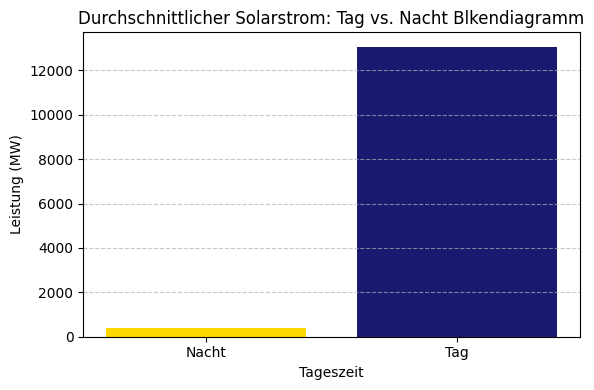

In [544]:
plt.figure(figsize=(6, 4))
plt.bar(solar_tag_nacht["Tag/Nacht"], solar_tag_nacht["Solar"], color=["gold", "midnightblue"])
plt.title("Durchschnittlicher Solarstrom: Tag vs. Nacht Blkendiagramm")
plt.ylabel("Leistung (MW)")
plt.xlabel("Tageszeit")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Wie viele Megawattstunden im gesamten Jahr erzeugt wurden

In [545]:
solar_tag_nacht_summe = df.groupby("Tag/Nacht")["Solar"].sum().reset_index()

In [546]:
ig = px.bar(
    solar_tag_nacht_summe,
    x="Tag/Nacht",
    y="Solar",
    color="Tag/Nacht",
    title="Gesamte Solarstromerzeugung 2024 – Tag vs. Nacht",
    labels={"Solar": "Leistung in MW"},
    text_auto=".2s"
)

fig.update_layout(showlegend=False)
fig.show()

# ***Solarstrom über den Tagesverlauf - Die Zeitumstellung??? hat einen Einfluss auf die Energieerzeugung (Zusatz)***

/var/folders/l8/cgzy5d692sd7d5_rw1hslkmw0000gn/T/ipykernel_47177/3772063783.py:14: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.

/Users/burcukiran/Library/Python/3.13/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) DejaVu Sans.



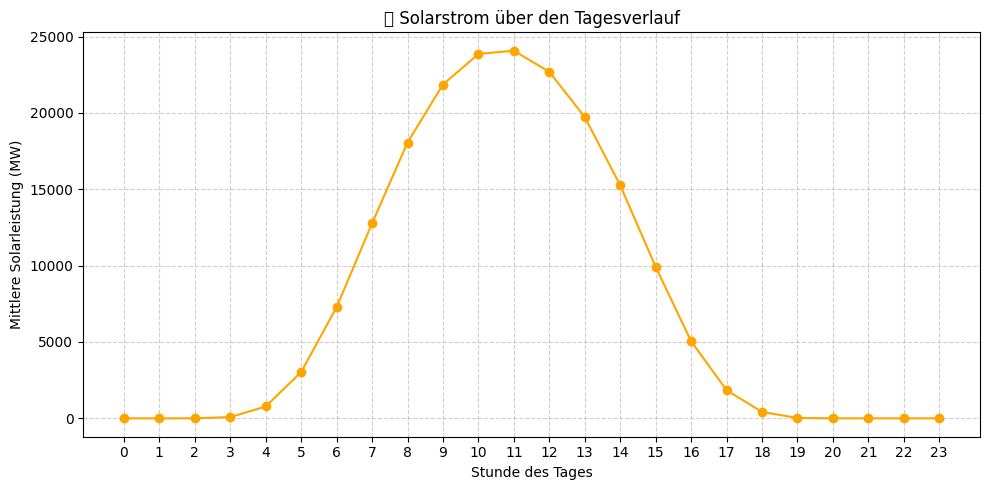

In [547]:
# Mittelwert pro Stunde berechnen
solar_by_hour = df.groupby("Stunde")["Solar"].mean().reset_index()

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(solar_by_hour["Stunde"], solar_by_hour["Solar"], marker="o", color="orange")
plt.title("⏰ Solarstrom über den Tagesverlauf")
plt.xlabel("Stunde des Tages")
plt.ylabel("Mittlere Solarleistung (MW)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(range(0, 24))  # 0–23 Uhr
plt.tight_layout()
plt.show()


# ***Wie definierst du Dämmerung?***
## Dämmerung (Twilight) – einfach erklärt:
## Dämmerung ist die Übergangszeit zwischen Nacht und Tag, in der die Sonne noch nicht direkt sichtbar ist, aber der Himmel schon (oder noch) aufgehellt ist.

## Man unterscheidet drei Stufen:
### Art der Dämmerung: Bürgerliche, Nautische, Astronomische
### Sonnenhöhe (unter dem Horizont): 	0° bis -6°, -6° bis -12°, -12° bis -18°
### Sichtbarkeit: Hell genug für Lesen im Freien, Horizont erkennbar, aber dunkel, Fast vollständige Dunkelheit

## Warum ist das wichtig? 
### Wenn du nicht nur wissen willst, ob es Tag oder Nacht ist, sondern auch: Wann der Übergang stattfindet Ob evtl. schon Solarenergie anläuft
### Dann ist Dämmerung eine realistischere Kategorie als bloß Uhrzeit oder Sonnenaufgang.

## Dafür brauchst du: astral (statt suntime)
### astral ist eine leistungsstarke Bibliothek, mit der du alle Dämmerungsphasen berechnen kannst.

# ***Im Jahr liefern die erneuerbaren Energien mehr Strom als die konventionellen Energien Gesamt Jahr 2024***


In [779]:
# Erneuerbare Energiequellen (können variieren, je nach Spaltennamen in deinem df)
erneuerbare = ["Wind Offshore", "Wind Onshore", "Solar", "Biomasse", "Geothermie"]
konventionelle = ["Braunkohle", "Steinkohle", "Öl", "Erdgas", "Müll", "Andere"]

# Falls du nicht weißt, wie sie heißen, mach:
print(df.columns)


Index(['Laufwasser', 'Biomasse', 'Braunkohle', 'Steinkohle', 'Öl', 'Erdgas',
       'Geothermie', 'Speicherwasser', 'Pumpspeicher', 'Andere', 'Müll',
       'Wind Offshore', 'Wind Onshore', 'Solar', 'Last', 'Stunde', 'Tag/Nacht',
       'Tageszeit_suntime'],
      dtype='object')


In [781]:
# Summen über das ganze Jahr (je nachdem, wie viele Datenpunkte = Stunden du hast)
erneuerbar_summe = df[erneuerbare].sum().sum()
konventionell_summe = df[konventionelle].sum().sum()


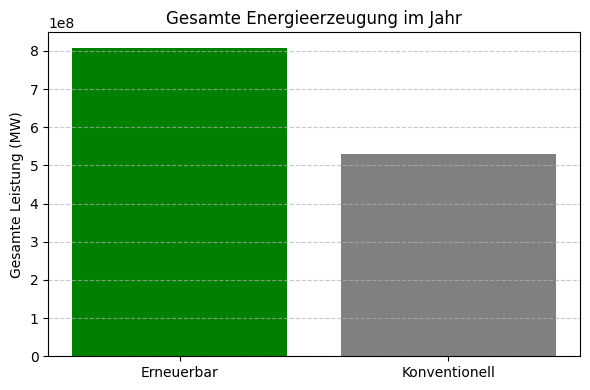

In [782]:
plt.figure(figsize=(6, 4))
plt.bar(["Erneuerbar", "Konventionell"],
        [erneuerbar_summe, konventionell_summe],
        color=["green", "gray"])

plt.title("Gesamte Energieerzeugung im Jahr")
plt.ylabel("Gesamte Leistung (MW)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# ***Kohle und Gas werden vor allem dann benötigt, wenn man eine hohe Last hat?***


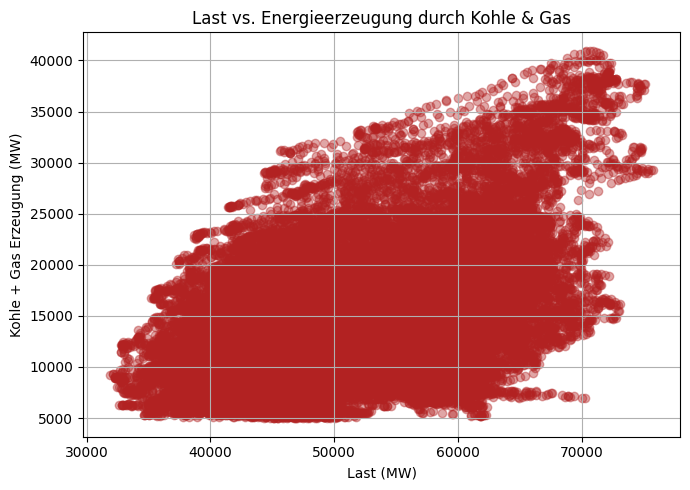

Korrelation zwischen Last und Kohle+Gas: 0.47


In [361]:

# Nur Kohle und Gas
kohle_gas = ["Braunkohle", "Steinkohle", "Erdgas"]

# Neue Spalte: gesamte Erzeugung durch Kohle + Gas
df["Kohle_Gas"] = df[kohle_gas].sum(axis=1)              ### In pandas steht das Argument axis=1 für:  „entlang der Spalten arbeiten“ (also Zeile für Zeile)

# Scatterplot: Last vs. Kohle + Gas
plt.figure(figsize=(7, 5))
plt.scatter(df["Last"], df["Kohle_Gas"], alpha=0.4, color="firebrick")
plt.title("Last vs. Energieerzeugung durch Kohle & Gas")
plt.xlabel("Last (MW)")
plt.ylabel("Kohle + Gas Erzeugung (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Korrelation berechnen
korrelation = df[["Last", "Kohle_Gas"]].corr().iloc[0, 1]
print(f"Korrelation zwischen Last und Kohle+Gas: {korrelation:.2f}")


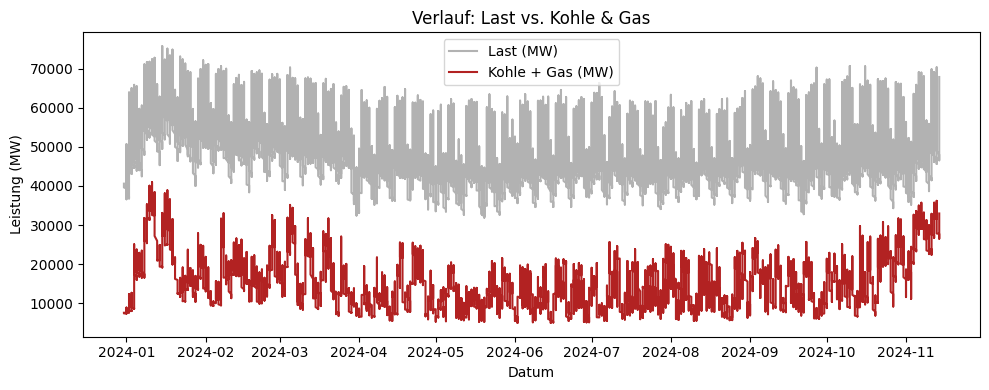

In [362]:
# Kohle + Gas berechnen
df["Kohle_Gas"] = df[["Braunkohle", "Steinkohle", "Erdgas"]].sum(axis=1)

# Plot erstellen
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))            # Größe, layout in Zoll
plt.plot(df["Datum_kurz"], df["Last"], label="Last (MW)", color="gray", alpha=0.6)
plt.plot(df["Datum_kurz"], df["Kohle_Gas"], label="Kohle + Gas (MW)", color="firebrick")
plt.title("Verlauf: Last vs. Kohle & Gas")
plt.xlabel("Datum")
plt.ylabel("Leistung (MW)")
plt.legend()                        #Zeigt die Legende oben im Plot an:„Last (MW)“ und „Kohle + Gas (MW)“ – du weißt also, welche Linie was ist.
plt.tight_layout()                  #Sorgt dafür, dass der Text nicht abgeschnitten wird und sich alles gut ins Bild einfügt (besonders bei Titeln, Achsen, Legende). Ohne das rutschen Texte manchmal raus.
plt.show()


# ***Wenn viel Energie aus erneuerbaren Energiequellen gewonnen wird, wird weniger Energie konventionell gewonnen***




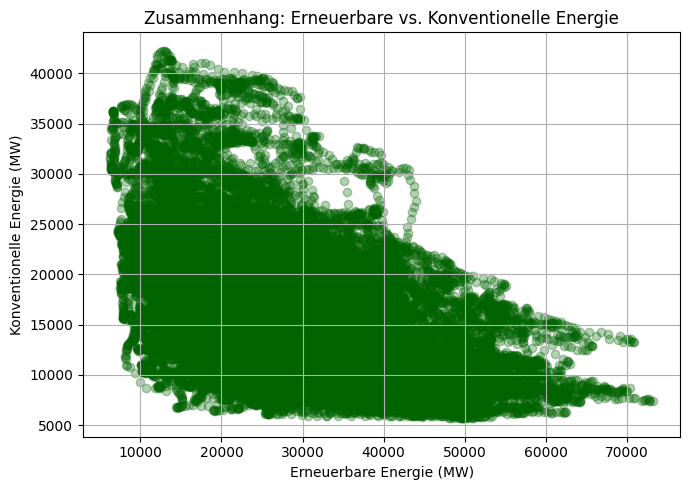

In [363]:
# 1. Summen berechnen
df["EE"] = df[["Wind Offshore", "Wind Onshore", "Solar", "Laufwasser", "Biomasse"]].sum(axis=1)
df["Konventionell"] = df[["Braunkohle", "Steinkohle", "Erdgas", "Müll", "Andere"]].sum(axis=1)

# 2. Scatterplot
plt.figure(figsize=(7, 5))
plt.scatter(df["EE"], df["Konventionell"], alpha=0.3, color="darkgreen")
plt.title("Zusammenhang: Erneuerbare vs. Konventionelle Energie")
plt.xlabel("Erneuerbare Energie (MW)")
plt.ylabel("Konventionelle Energie (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [300]:
print(df.columns.tolist())


['Stunde', 'Last', 'Datum', 'Datum_kurz', 'Dämmerung_Beginn', 'Dämmerung_Ende', 'Tageszeit_neu']


### INDEX? 
### ✅ Zeitsortierung	df.sort_index() sortiert nach Datum
### ✅ Resampling	df.resample("D").mean() → Tagesdurchschnitt
### ✅ Schneller Zugriff	df.loc["2024-01-01"] → Alle Daten an diesem Tag
### ✅ Merging nach Datum	Du kannst einfach mit Dämmerungszeiten mergen
### ✅ Zeitvergleich	Du kannst mit df.index direkt rechnen oder filtern

### Index zu datetime64 konvertieren und Datum_kurz erzeugen


# ***ASTRAL***

### 1.Bibliotheken & Standort festlegen

In [783]:
import pandas as pd
import numpy as np                  #numerical python, mathematische berechnungen
from astral.sun import sun
from astral import LocationInfo
import datetime
import pytz                         # pythoon timezone


### 2. Ort definieren

In [784]:
stadt = LocationInfo("Berlin", "Germany", "Europe/Berlin", 52.52, 13.405)


### Definieren den Ort Berlin mit Name, Zeitzone und Koordinaten. Damit weiß astral, für welchen Standort es die Sonnenzeiten berechnen soll.

### 3. Dämmerungsdaten für ein Jahr berechnen
### 4. Schleife über jeden Tag & Berechnung
### 5. Dämmerungs-DataFrame erzeugen

In [785]:
# Zeitraum festlegen
start = datetime.date(2024, 1, 1)
ende = datetime.date(2024, 12, 31)

# Leere Liste für Ergebnisse
rows = []

# Alle Tage durchgehen
for tag in pd.date_range(start, ende, freq="D"):
    s = sun(stadt.observer, date=tag, tzinfo=stadt.timezone)
    rows.append({
        "Datum": tag,
        "Dämmerung_Beginn": s["dawn"],
        "Sonnenaufgang": s["sunrise"],
        "Sonnenuntergang": s["sunset"],
        "Dämmerung_Ende": s["dusk"]
    })

# DataFrame erzeugen
df_dämmerung = pd.DataFrame(rows)

# Datum als Index
df_dämmerung.set_index("Datum", inplace=True)

# Zusätzliche Spalte zum Joinen
df_dämmerung["Datum_kurz"] = df_dämmerung.index.date


### Du legst den Zeitraum fest (1.1.–31.12.2024) und bereitest eine Liste vor, in die später alle berechneten Sonnenzeiten gespeichert werden.
### Für jeden Tag wird sun(...) aufgerufen und liefert vier Zeitpunkte: dawn (erste Helligkeit), sunrise, sunset, dusk (letztes Licht). Diese Infos landen geordnet in der Liste rows.
### Du wandelst die Liste in einen DataFrame um. Der Index ist das vollständige Datum (inkl. Uhrzeit). Zusätzlich wird Datum_kurz erzeugt, um später einfacher joinen zu können.

### 6. Haupt-DataFrame erstellen (Testdaten)

In [611]:
# Beispiel-Daten (ersetzen durch deine echten)
df = pd.DataFrame({
    "Stunde": [0, 1, 2, 3, 12, 15, 18, 21, 23]*10,
    "Last": np.random.randint(10000, 15000, size=90),
    "Datum": pd.date_range("2024-01-01", periods=90, freq="H")
})

# Zeitspalten konvertieren
df["Datum"] = pd.to_datetime(df["Datum"])
df["Datum_kurz"] = df["Datum"].dt.date


/var/folders/l8/cgzy5d692sd7d5_rw1hslkmw0000gn/T/ipykernel_47177/4106370001.py:5: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



### Du simulierst Stromverbrauchsdaten („Last“) für zufällige Stunden – wichtig zum Testen. Datum_kurz ist nur das Tagesdatum – ideal für die Verknüpfung mit den Dämmerungsdaten.

### 7. Join: Dämmerung in Haupt-Datensatz integrieren

In [612]:
df = df.merge(df_dämmerung[["Datum_kurz", "Dämmerung_Beginn", "Dämmerung_Ende"]], on="Datum_kurz", how="left")


### Die berechneten Dämmerungszeiten (Beginn & Ende) werden an deinen Datensatz drangehängt – basierend auf dem Tagesdatum.

### 8. Funktion: Tageszeit berechnen

In [613]:
def bestimme_tageszeit(row):
    stunde = row["Stunde"]
    datum = row["Datum_kurz"]

    try:
        zeitpunkt = pd.Timestamp(f"{datum} {int(stunde)}:00").tz_localize("Europe/Berlin")
    except:
        return "Unbekannt"

    beginn = row["Dämmerung_Beginn"]
    ende = row["Dämmerung_Ende"]

    if pd.isna(beginn) or pd.isna(ende):
        return "Unbekannt"
    elif beginn <= zeitpunkt <= ende:
        return "Tag"
    else:
        return "Nacht"


### Du überprüfst: Liegt die gemessene Stunde innerhalb der Dämmerung. Wenn ja → "Tag", sonst "Nacht".

### 9. Neue Spalte erzeugen: Zeitkategorie

In [614]:
df["Tageszeit_neu"] = df.apply(bestimme_tageszeit, axis=1)


### Für jede Zeile des DataFrames wird die Tageszeitkategorie neu berechnet. Das landet in der Spalte "Tageszeit_neu".

### 10. Überprüfung

In [615]:
print(df[["Datum_kurz", "Stunde", "Dämmerung_Beginn", "Dämmerung_Ende", "Tageszeit_neu"]].head(10))


   Datum_kurz  Stunde                 Dämmerung_Beginn  \
0  2024-01-01       0 2024-01-01 07:35:31.903187+01:00   
1  2024-01-01       1 2024-01-01 07:35:31.903187+01:00   
2  2024-01-01       2 2024-01-01 07:35:31.903187+01:00   
3  2024-01-01       3 2024-01-01 07:35:31.903187+01:00   
4  2024-01-01      12 2024-01-01 07:35:31.903187+01:00   
5  2024-01-01      15 2024-01-01 07:35:31.903187+01:00   
6  2024-01-01      18 2024-01-01 07:35:31.903187+01:00   
7  2024-01-01      21 2024-01-01 07:35:31.903187+01:00   
8  2024-01-01      23 2024-01-01 07:35:31.903187+01:00   
9  2024-01-01       0 2024-01-01 07:35:31.903187+01:00   

                    Dämmerung_Ende Tageszeit_neu  
0 2024-01-01 16:44:02.771182+01:00         Nacht  
1 2024-01-01 16:44:02.771182+01:00         Nacht  
2 2024-01-01 16:44:02.771182+01:00         Nacht  
3 2024-01-01 16:44:02.771182+01:00         Nacht  
4 2024-01-01 16:44:02.771182+01:00           Tag  
5 2024-01-01 16:44:02.771182+01:00           Tag  
6 20

In [616]:
df

,Stunde,Last,Datum,Datum_kurz,Dämmerung_Beginn,Dämmerung_Ende,Tageszeit_neu
0,0,14533,2024-01-01 00:00:00,2024-01-01,2024-01-01 07:35:31.903187+01:00,2024-01-01 16:44:02.771182+01:00,Nacht
1,1,12554,2024-01-01 01:00:00,2024-01-01,2024-01-01 07:35:31.903187+01:00,2024-01-01 16:44:02.771182+01:00,Nacht
2,2,11014,2024-01-01 02:00:00,2024-01-01,2024-01-01 07:35:31.903187+01:00,2024-01-01 16:44:02.771182+01:00,Nacht
3,3,13600,2024-01-01 03:00:00,2024-01-01,2024-01-01 07:35:31.903187+01:00,2024-01-01 16:44:02.771182+01:00,Nacht
4,12,13259,2024-01-01 04:00:00,2024-01-01,2024-01-01 07:35:31.903187+01:00,2024-01-01 16:44:02.771182+01:00,Tag
...,...,...,...,...,...,...,...
85,12,13995,2024-01-04 13:00:00,2024-01-04,2024-01-04 07:35:13.845255+01:00,2024-01-04 16:47:11.158502+01:00,Tag
86,15,13537,2024-01-04 14:00:00,2024-01-04,2024-01-04 07:35:13.845255+01:00,2024-01-04 16:47:11.158502+01:00,Tag
87,18,13545,2024-01-04 15:00:00,2024-01-04,2024-01-04 07:35:13.845255+01:00,2024-01-04 16:47:11.158502+01:00,Nacht
88,21,14238,2024-01-04 16:00:00,2024-01-04,2024-01-04 07:35:13.845255+01:00,2024-01-04 16:47:11.158502+01:00,Nacht


### 1. SICHERUNG 2 DF gesichert einmal mit Energie einmal mit Dämmerungszeiten 

In [788]:
df_with_astral = df.copy()


In [789]:
df_energy = df_backup.copy()

### df_with_astral: Kopie von df, in dem bereits die Astral-Zeiten (Dämmerung_Beginn, Dämmerung_Ende, etc.) enthalten sind.
### df_energy: Kopie vom reinen Energiedaten-Backup, bevor du Astral hinzugefügt hast.

#  Hypothese „In der Dämmerung wird mehr Windstrom produziert“
### Ob in den Dämmerungszeiten (Dämmerung_Beginn bis Dämmerung_Ende) durchschnittlich mehr Windenergie produziert wird als in anderen Zeiten

### 2. Von Object zu Nummer / Zeit
### normalize() setzt die Uhrzeit auf 00:00:00, damit das Join auf Datumsebene funktioniert.

In [790]:
df_energy["Datum_kurz"] = pd.to_datetime(df_energy["Datum_kurz"]).dt.normalize()
df_with_astral["Datum_kurz"] = pd.to_datetime(df_with_astral["Datum_kurz"]).dt.normalize()


KeyError: 'Datum_kurz'

### 3. Merge: Zeiten & Energie vereint

In [628]:
df_final = df_energy.merge(
    df_with_astral[["Datum_kurz", "Dämmerung_Beginn", "Dämmerung_Ende", "Tageszeit_neu"]],
    on="Datum_kurz",
    how="left"
)


### etzt wird dein Energiedaten-DataFrame (df_energy) mit den Astral-Zeiten ergänzt. Die neue Tabelle df_final enthält jetzt: Energiearten wie Wind, Solar, etc. Tageszeit-Infos wie „Tag“ oder „Nacht“ aus Astral.

### Überprüfung Format

In [629]:
print(df_energy["Datum_kurz"].dtype)
print(df_with_astral["Datum_kurz"].dtype)


datetime64[ns]
datetime64[ns]


In [630]:
print(df_final.columns.tolist())


['Datum', 'Laufwasser', 'Biomasse', 'Braunkohle', 'Steinkohle', 'Öl', 'Erdgas', 'Geothermie', 'Speicherwasser', 'Pumpspeicher', 'Andere', 'Müll', 'Wind Offshore', 'Wind Onshore', 'Solar', 'Last', 'Stunde', 'Tag/Nacht', 'Datum_kurz', 'Sonnenaufgang_x', 'Sonnenuntergang_x', 'Sonnenaufgang_y', 'Sonnenuntergang_y', 'Sonnenaufgang', 'Sonnenuntergang', 'Dämmerung_Beginn', 'Dämmerung_Ende', 'Tageszeit_neu']


### 4. Gruppiere nach Tageszeit_neu und berechne Mittelwerte

In [ ]:
df_final.groupby("Tageszeit_neu")[["Wind Onshore", "Wind Offshore"]].mean()


# Das zeigt dir den durchschnittlich produzierten Windstrom pro Tageszeit-Kategorie: Tag, Nacht, Dämmerung (falls du diese Kategorie separat hinzugefügt hast)


,Wind Onshore,Wind Offshore
Tageszeit_neu,,
Nacht,28989.960774,4007.634256
Tag,29263.801354,3946.063854


### 5. Gesamte Windenergie (Onshore + Offshore)


In [632]:
df_final["Wind Gesamt"] = df_final["Wind Onshore"] + df_final["Wind Offshore"]

df_final.groupby("Tageszeit_neu")["Wind Gesamt"].mean()


Tageszeit_neu
Nacht    32997.595030
Tag      33209.865208
Name: Wind Gesamt, dtype: float64

### 6. Balkendiagramm

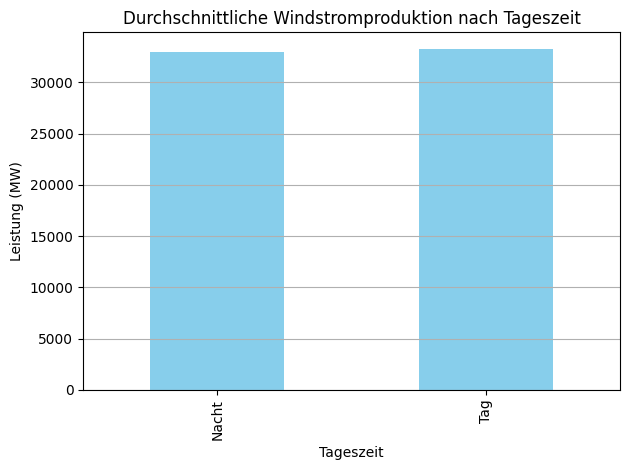

In [633]:


df_final.groupby("Tageszeit_neu")["Wind Gesamt"].mean().plot(kind="bar", color="skyblue")
plt.title("Durchschnittliche Windstromproduktion nach Tageszeit")
plt.ylabel("Leistung (MW)")
plt.xlabel("Tageszeit")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## 📊 Projektzusammenfassung: Datenbereinigung, Zeitverarbeitung & Analyse

**📦 Verwendete Bibliotheken:**  
`pandas` (für Datenanalyse), `numpy` (für numerische Berechnungen), `matplotlib.pyplot` (für Visualisierung), `astral` & `pytz` (für Sonnenzeiten & Zeitzonen).

**🧹 Datenbereinigung & Vorbereitung:**  
- Zeilen mit fehlenden Werten entfernen → `df.dropna()`  
- Spalten umbenennen → `df.rename(columns={...})`  
- Zeitspalte in Datetime-Format mit UTC umwandeln → `pd.to_datetime(..., utc=True)`  
- Datum als Index setzen → `df.set_index('Datum')`  
- Prüfung auf leere Werte → `df['Datum'].isna().sum()`

**🔁 Resampling & Aggregation:**  
- Tagesdurchschnitt berechnen → `df.resample("D").mean()`  
- Tag-Nacht-Unterscheidung mit Sonnenauf- & untergangszeiten (via `astral`)  

**➕ Neue Spalten für Energiearten:**  
- Erneuerbare Energie (EE) → `df['EE'] = df[['Solar', 'Wind Onshore', 'Wind Offshore']].sum(axis=1)`  
- Konventionelle Energie → `df['Konventionell'] = df[['Kohle_Gas', 'Müll', 'Öl', 'Erdgas']].sum(axis=1)`

**🌍 Tageszeitberechnung mit Astral:**  
- Standort Berlin definieren mit `LocationInfo(...)`  
- Sonnenzeiten (`dawn`, `sunrise`, `sunset`, `dusk`) pro Tag berechnen mit `sun(...)`  
- `datetime`-Vergleiche mit UTC-aware Zeitpunkten

**📅 Neue Spalte `"Tageszeit_neu"` für Zeitkategorien:**  
- Per Schleife: Wenn Zeit zwischen `dawn` und `sunrise` oder `sunset` und `dusk` → `"Dämmerung"`  
- sonst `"Tag"`, `"Nacht"`, `"Mittag"` usw.

**📊 Visualisierungen:**  
- Zeitreihenplot mit `plt.plot(...)` für z. B. `EE`, `Konventionell`  
- Gruppierung: `df.groupby("Tageszeit_neu")["Wind Onshore"].mean().plot(kind='bar')`  
- Analyse der Windstromproduktion nach Tageszeit (Dämmerung vs. Mittag/Nacht)

**🧠 Hypothese:**  
„In der Dämmerung wird mehr Windstrom produziert als zur Mittags- oder Mitternachtszeit“  
→ überprüft durch Mittelwertvergleich nach Gruppierung über `Tageszeit_neu`

**💾 Datensicherung:**  
- Zwischenstände speichern → `df.to_csv("backup.csv")`  
- Mehrere DataFrames im Projekt genutzt (z. B. `df_backup`, `df_suntime`, `df_astral`)

**🧰 Weitere Methoden & Tools:**  
- `.groupby(...)` zur Gruppierung  
- `.sum(axis=1)` zum Kombinieren mehrerer Spalten  
- Logische Bedingungen in Schleifen  
- Fehlersuche mit `df.columns`, `df.dtypes`, `.isna().sum()`  
- Anzeige & Kontrolle mit `.head()` und `.tail()`


### Tagsüber wird im Schnitt etwas mehr Windstrom produziert als nachts – der Unterschied ist aber sehr gering.

### Das widerspricht ein wenig der Annahme, dass z. B. nachts weniger Wind geht – oder zeigt, dass Wind nicht stark tageszeitabhängig ist.

### Der Unterschied ist nicht dramatisch, also: die Windstromproduktion scheint relativ stabil über den Tag verteilt zu sein.

# ***Wie rechnet man mit Uhrzeiten und Datumsangaben (mit Computerprogrammen)***

## Wie rechnet man mit Uhrzeiten und Datumsangaben (mit Computerprogrammen)?
### Zeitspalten in ein Datumsformat umwandeln
### Damit ein Computer mit Zeit rechnen kann, müssen Strings wie "2025-06-05 14:00" in echte Zeitobjekte konvertiert werden.

### df['Datum'] = pd.to_datetime(df['Datum'], utc=True, errors="coerce")

# ***Gibt es eine Zeitumstellung in den Daten? Falls ja, wie wirkt sie sich aus?***

### Ja, wenn der Datensatz Zeitstempel mit Zeitzone „Europe/Berlin“ verwendet (wie z. B. mit tz_localize("Europe/Berlin")), dann enthält er automatisch die Zeitumstellungen:
### Letzter Sonntag im März: Uhr wird eine Stunde vorgestellt (02:00 → 03:00)
### Letzter Sonntag im Oktober: Uhr wird eine Stunde zurückgestellt (03:00 → 02:00)

###  Sommerzeit beginnt	2024-03-31	1 Stunde fehlt – z. B. 02:30 gibt es nicht
### Sommerzeit endet	2024-10-27	1 Stunde doppelt – z. B. 02:15 existiert zweimal

In [287]:
print(df.columns)


Index(['Laufwasser', 'Biomasse', 'Braunkohle', 'Steinkohle', 'Öl', 'Erdgas',
       'Geothermie', 'Speicherwasser', 'Pumpspeicher', 'Andere', 'Müll',
       'Wind Offshore', 'Wind Onshore', 'Solar', 'Last', 'Stunde', 'Tag/Nacht',
       'Datum_kurz', 'Sonnenaufgang', 'Sonnenuntergang', 'Kohle_Gas'],
      dtype='object')


In [288]:
"Timestamp" in df.columns


False